In [108]:
import math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeClassifier
eps = np.finfo(float).eps
from sklearn import linear_model
from numpy import mean
from numpy import cov
from numpy import mean
from numpy import std
from numpy.linalg import eig
import pandas as pd
import numpy.random as rd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn.metrics.cluster import contingency_matrix

In [109]:
df=pd.read_csv('data.csv')

In [110]:
msk = np.random.rand(len(df)) < 0.2
train = df[msk]
test = df[~msk]

In [111]:
train_Y=train['xAttack']
train_X=train.drop('xAttack',axis=1)
# train_X=(train_X-train_X.mean())/train_X.std()
M = mean(train_X, axis=0)
S = std(train_X,axis=0)
# print(M)
train_X=(train_X - M)/S
# train_X

In [112]:
trainYnew=[]
for i in train_Y:
    if i=='normal':
        trainYnew.append(0)
    elif i=='dos':
        trainYnew.append(1)
    elif i=='r2l':
        trainYnew.append(2)
    elif i=='probe':
        trainYnew.append(3)
    elif i=='u2r':
        trainYnew.append(4)


In [113]:
mean_vec = np.mean(train_X, axis=0)
cov_mat = (train_X - mean_vec).T.dot((train_X - mean_vec)) / (train_X.shape[0]-1)

In [114]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [115]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# # Visually confirm that the list is correctly sorted by decreasing eigenvalues
# print('Eigenvalues in descending order:')
# for i in eig_pairs:
#     print(i[0])

In [116]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

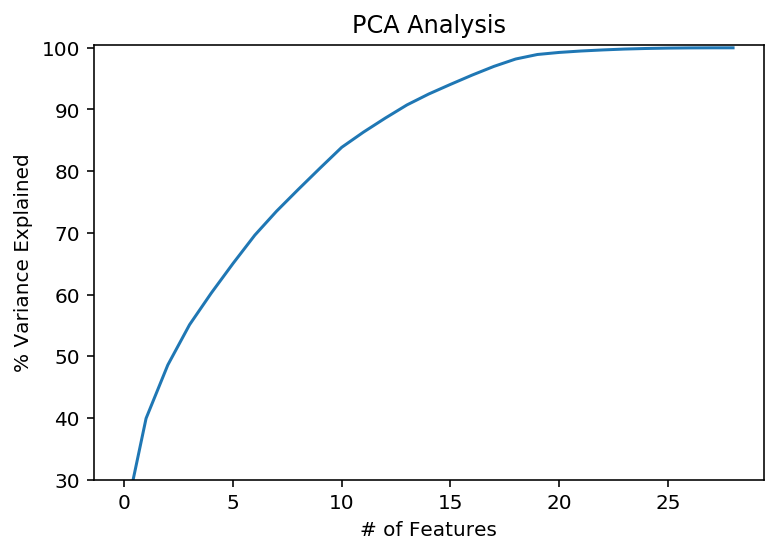

In [117]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(cum_var_exp)

In [118]:
matrix_w=np.hstack((eig_pairs[0][1].reshape(29,1),eig_pairs[1][1].reshape(29,1),eig_pairs[2][1].reshape(29,1),
                    eig_pairs[3][1].reshape(29,1),eig_pairs[4][1].reshape(29,1),
                    eig_pairs[5][1].reshape(29,1),eig_pairs[6][1].reshape(29,1),
                    eig_pairs[7][1].reshape(29,1),eig_pairs[8][1].reshape(29,1),
                    eig_pairs[9][1].reshape(29,1),eig_pairs[10][1].reshape(29,1),
                    eig_pairs[11][1].reshape(29,1),eig_pairs[12][1].reshape(29,1),eig_pairs[13][1].reshape(29,1)))
Y = train_X.dot(matrix_w)
# XX=pd.DataFrame(Y=Y[1:,1:],index=Y[1:,0],columns=Y[0,1:])  # 1st row as the column names


In [119]:
Y=Y.head(20000)
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')  
y_pred=cluster.fit_predict(Y)

In [120]:
trainYnew = np.array(trainYnew)
trainYnew = trainYnew[0:20000]

In [121]:
contin=contingency_matrix(y_pred,trainYnew)
ans=0
for i in contin:
    ans=ans+max(i)
purity=ans/float(len(train_X))
purity

0.41950372795771035